In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/data/flower.zip" -d "/content/drive/My Drive/data/flowers-recognition/"

Archive:  /content/drive/My Drive/data/flower.zip
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/My Drive/data/flowers-recognition/flowers/daisy/10391248763_1d16681106_n.jpg  


DATA UNDERSTANDING

In [ ]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/drive/My Drive/data/flowers-recognition/flowers'

In [ ]:
import os
print(os.listdir(base_dir))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


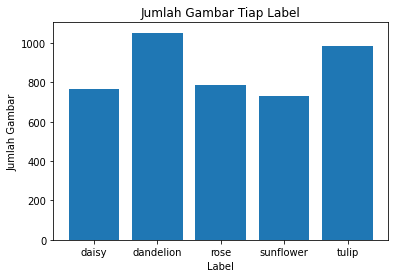

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

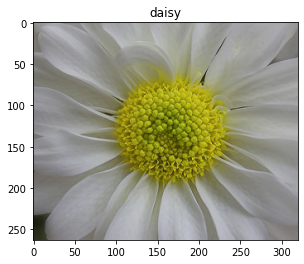

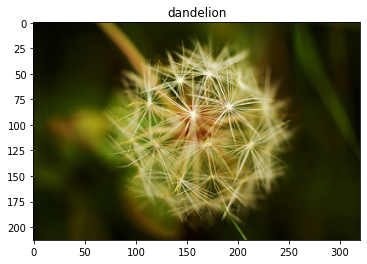

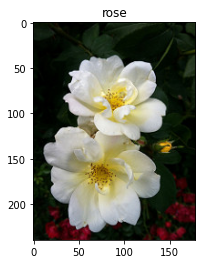

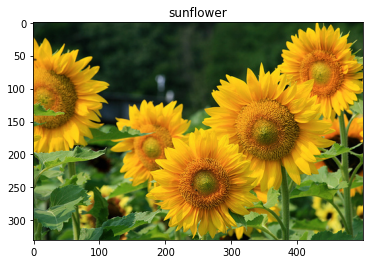

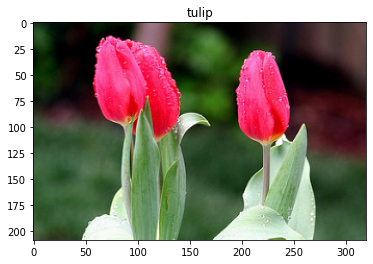

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

DATA PREPARATION

In [ ]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999

In [ ]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [ ]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

MODELLING

In [ ]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 282s 3s/step - loss: 1.3185 - accuracy: 0.4128 - val_loss: 1.2399 - val_accuracy: 0.4477
Epoch 2/20
109/109 [==============================] - 264s 2s/step - loss: 1.0820 - accuracy: 0.5603 - val_loss: 1.1334 - val_accuracy: 0.5512
Epoch 3/20
109/109 [==============================] - 266s 2s/step - loss: 1.0052 - accuracy: 0.6063 - val_loss: 0.9735 - val_accuracy: 0.6023
Epoch 4/20
109/109 [==============================] - 270s 2s/step - loss: 0.9199 - accuracy: 0.6430 - val_loss: 1.0218 - val_accuracy: 0.5756
Epoch 5/20
109/109 [==============================] - 272s 2s/step - loss: 0.8516 - accuracy: 0.6711 - val_loss: 0.8638 - val_accuracy: 0.6663
Epoch 6/20
109/109 [==============================] - 265s 2s/step - loss: 0.8525 - accuracy: 0.6656 - val_loss: 0.8177 - val_accuracy: 0.6756
Epoch 7/20
109/109 [==============================] - 266s 2s/step - loss: 0.8107 - accuracy: 0.6876 - val_loss: 0.8727 - val_accuracy: 0.6756

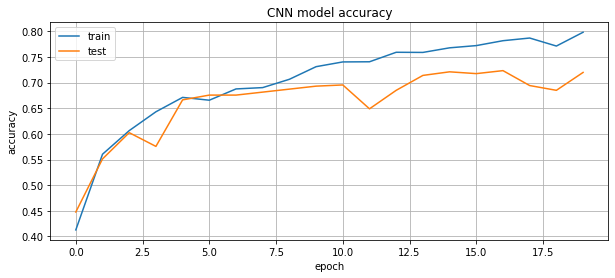

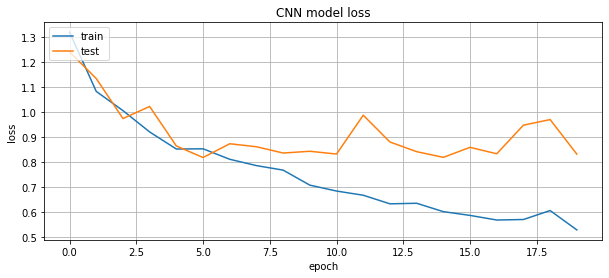

In [ ]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

Uji Coba Model

In [ ]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Saving 134409839_71069a95d1_m.jpg to 134409839_71069a95d1_m (3).jpg
134409839_71069a95d1_m.jpg
daisy


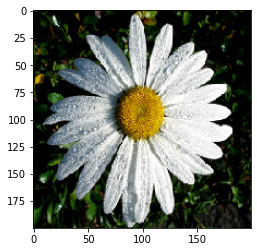

In [ ]:
# Menguji coba model
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = cnn_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)
  
  print(fn)
  if classes==0:
    print('daisy')
  elif classes==1:
    print('dandelion')
  elif classes==2:
    print('rose')
  elif classes==3:
    print('sunflower')
  else:
    print('tulip')

Deployment

In [ ]:
cnn_model.save('model-flowers-recognition.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model-flowers-recognition.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpiy5mgndh/assets


In [ ]:
# Instal TensorflowJS
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.0 MB/s 
     |████████████████████████████████| 462 kB 53.4 MB/s 


In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model-flowers-recognition.h5 /content/modeltfjs